In [1]:
import pandas as pd
import numpy as np
import pandahouse as ph
from datetime import date
import holidays
from fbprophet import Prophet

In [2]:
p = r'D:\Литература\Кругозор\Хороший программист\Карпов\Финал\test2_completed.csv'

In [3]:
test_2 = pd.read_csv(p)
test_2

Дата  Число заказов
0   2020-01-05            650
1   2020-01-12            837
2   2020-01-19           1020
3   2020-01-26           1176
4   2020-02-02           1489
5   2020-02-09           1823
6   2020-02-16           1991
7   2020-02-23           2166
8   2020-03-01           2334
9   2020-03-08           2607
10  2020-03-15           2734
11  2020-03-22           3492
12  2020-03-29           3608
13  2020-04-05           3857

In [4]:
test_2.shape

(14, 2)

In [5]:
test_2.dtypes

Дата             object
Число заказов     int64
dtype: object

In [6]:
test_2 = test_2.astype({'Дата': 'datetime64'})
test_2.head()

Дата  Число заказов
0 2020-01-05            650
1 2020-01-12            837
2 2020-01-19           1020
3 2020-01-26           1176
4 2020-02-02           1489

In [7]:
test_2.dtypes

Дата             datetime64[ns]
Число заказов             int64
dtype: object

In [8]:
test_2.nunique()

Дата             14
Число заказов    14
dtype: int64

In [9]:
test_2.isna().sum()

Дата             0
Число заказов    0
dtype: int64

In [10]:
test_2.head()

Дата  Число заказов
0 2020-01-05            650
1 2020-01-12            837
2 2020-01-19           1020
3 2020-01-26           1176
4 2020-02-02           1489

In [11]:
holidays_dict = holidays.RU(years=2020)
df_holidays = pd.DataFrame.from_dict(holidays_dict, orient='index') \
    .reset_index()
df_holidays = df_holidays.rename({'index': 'ds', 0: 'holiday'}, axis ='columns')
df_holidays['ds'] = pd.to_datetime(df_holidays.ds)
df_holidays = df_holidays.sort_values(by=['ds'])
df_holidays = df_holidays.reset_index(drop=True)
df_holidays

ds                   holiday
0  2020-01-01                 Новый год
1  2020-01-02                 Новый год
2  2020-01-03                 Новый год
3  2020-01-04                 Новый год
4  2020-01-05                 Новый год
5  2020-01-06                 Новый год
6  2020-01-07    Православное Рождество
7  2020-01-08                 Новый год
8  2020-02-23  День защитника отечества
9  2020-03-08               День женщин
10 2020-05-01    Праздник Весны и Труда
11 2020-05-09               День Победы
12 2020-06-12               День России
13 2020-11-04   День народного единства

In [12]:
# приводим dataframe к нужному формату

test_2.rename(columns = {'Дата': 'ds','Число заказов': 'y'} , inplace=True)
test_2.head()

ds     y
0 2020-01-05   650
1 2020-01-12   837
2 2020-01-19  1020
3 2020-01-26  1176
4 2020-02-02  1489

In [13]:
# Период, который надо предсказать 

predictions = 90

train_df = test_2

In [14]:
# Настраиваем prophet – говорим ему учитывать праздники, сезонности отключаем
# определяем вручную местоположение 'точек излома' тренда при помощи аргумента changepoints 

m = Prophet(changepoints=['2020-02-02'], holidays=df_holidays, daily_seasonality=False,
            weekly_seasonality=False, yearly_seasonality=False)
m.fit(train_df)

INFO:numexpr.utils:NumExpr defaulting to 6 threads.


In [15]:
# Предсказываем 90 дней

future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)

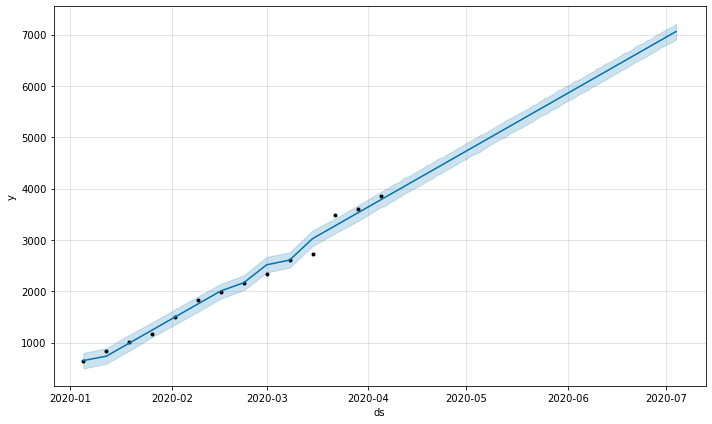

In [16]:
# Смотрим, что предсказалось

m.plot(forecast);

In [17]:
forecast.head(15)

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2020-01-05   480.347946   494.423794   797.808017   480.347946   
1  2020-01-12   734.711139   589.911013   890.900948   734.711139   
2  2020-01-19   989.074332   838.897624  1150.319295   989.074332   
3  2020-01-26  1243.437524  1108.682794  1394.574951  1243.437524   
4  2020-02-02  1497.800717  1351.400296  1645.952367  1497.800717   
5  2020-02-09  1752.163910  1599.892572  1897.537897  1752.163910   
6  2020-02-16  2006.527103  1858.641603  2145.827753  2006.527103   
7  2020-02-23  2260.890295  2020.094558  2311.082565  2260.890295   
8  2020-03-01  2515.253488  2366.065018  2669.068763  2515.253488   
9  2020-03-08  2769.616681  2460.079268  2757.166077  2769.616681   
10 2020-03-15  3023.979873  2879.415331  3184.426207  3023.979873   
11 2020-03-22  3278.343066  3133.978504  3417.612534  3278.343066   
12 2020-03-29  3532.706259  3371.280656  3677.738811  3532.706259   
13 2020-04-05  3787.069451  3642.594645  3939.969768  3787.069451   
14 2020-04-06  3823.407050  3660.938286  3979.809810  3823.407050   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    480.347946      169.672360            169.672360            169.672360   
1    734.711139        0.000000              0.000000              0.000000   
2    989.074332        0.000000              0.000000              0.000000   
3   1243.437524        0.000000              0.000000              0.000000   
4   1497.800717        0.000000              0.000000              0.000000   
5   1752.163910        0.000000              0.000000              0.000000   
6   2006.527103        0.000000              0.000000              0.000000   
7   2260.890295      -94.893586            -94.893586            -94.893586   
8   2515.253488        0.000000              0.000000              0.000000   
9   2769.616681     -162.625731           -162.625731           -162.625731   
10  3023.979873        0.000000              0.000000              0.000000   
11  3278.343066        0.000000              0.000000              0.000000   
12  3532.706259        0.000000              0.000000              0.000000   
13  3787.069451        0.000000              0.000000              0.000000   
14  3823.407050        0.000000              0.000000              0.000000   

      holidays  ...  Православное Рождество  Православное Рождество_lower  \
0   169.672360  ...                     0.0                           0.0   
1     0.000000  ...                     0.0                           0.0   
2     0.000000  ...                     0.0                           0.0   
3     0.000000  ...                     0.0                           0.0   
4     0.000000  ...                     0.0                           0.0   
5     0.000000  ...                     0.0                           0.0   
6     0.000000  ...                     0.0                           0.0   
7   -94.893586  ...                     0.0                           0.0   
8     0.000000  ...                     0.0                           0.0   
9  -162.625731  ...                     0.0                           0.0   
10    0.000000  ...                     0.0                           0.0   
11    0.000000  ...                     0.0                           0.0   
12    0.000000  ...                     0.0                           0.0   
13    0.000000  ...                     0.0                           0.0   
14    0.000000  ...                     0.0                           0.0   

    Православное Рождество_upper  Праздник Весны и Труда  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
5                            0.0                

**Оценка качества модели**

In [18]:
# за основу возьмем первые 7 значение и предкажем оставшиеся
# predictions_check - период который надо отрезать и предсказать

predictions_check = 7
train_df_1 = test_2[:-predictions_check]

In [19]:
train_df_1

ds     y
0 2020-01-05   650
1 2020-01-12   837
2 2020-01-19  1020
3 2020-01-26  1176
4 2020-02-02  1489
5 2020-02-09  1823
6 2020-02-16  1991

In [20]:
# создаем объект класса Prophet

m_check = Prophet()
m_check.fit(train_df_1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


In [21]:
# чтобы построить прогноз вызываем у модели функцию predict и передаем в нее полученный на предыдущем шаге dataframe

future_check = m_check.make_future_dataframe(periods=predictions_check, freq='W')
forecast_check = m_check.predict(future_check)

In [22]:
forecast_check.tail(6)

ds        trend   yhat_lower   yhat_upper  trend_lower  \
8  2020-03-01  2437.457175  2366.953421  2508.503346  2437.408076   
9  2020-03-08  2668.229834  2599.559066  2742.497460  2668.123058   
10 2020-03-15  2899.002493  2823.630924  2973.509622  2898.822017   
11 2020-03-22  3129.775152  3054.399466  3213.467501  3129.522064   
12 2020-03-29  3360.547811  3288.951679  3439.086299  3360.206952   
13 2020-04-05  3591.320470  3516.190501  3662.890712  3590.892453   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
8   2437.508055             0.0                   0.0                   0.0   
9   2668.335095             0.0                   0.0                   0.0   
10  2899.169123             0.0                   0.0                   0.0   
11  3130.008771             0.0                   0.0                   0.0   
12  3360.879834             0.0                   0.0                   0.0   
13  3591.748697             0.0                   0.0                   0.0   

    multiplicative_terms  multiplicative_terms_lower  \
8                    0.0                         0.0   
9                    0.0                         0.0   
10                   0.0                         0.0   
11                   0.0                         0.0   
12                   0.0                         0.0   
13                   0.0                         0.0   

    multiplicative_terms_upper         yhat  
8                          0.0  2437.457175  
9                          0.0  2668.229834  
10                         0.0  2899.002493  
11                         0.0  3129.775152  
12                         0.0  3360.547811  
13                         0.0  3591.320470

In [23]:
m_check.plot(forecast_check);

In [24]:
# объединим forecast с нашими исходными наблюдениями

cmp_df = forecast_check.set_index('ds') \
        [['yhat', 'yhat_lower', 'yhat_upper']] \
        .join(test_2.set_index('ds'))
cmp_df

yhat   yhat_lower   yhat_upper     y
ds                                                     
2020-01-05   591.571509   522.586107   667.727600   650
2020-01-12   822.230739   753.459539   899.693055   837
2020-01-19  1052.889969   982.595418  1122.738085  1020
2020-01-26  1283.593879  1212.781227  1364.095332  1176
2020-02-02  1514.366538  1444.136021  1591.400534  1489
2020-02-09  1745.139197  1673.774957  1822.409515  1823
2020-02-16  1975.911856  1895.904836  2051.968376  1991
2020-02-23  2206.684515  2131.034322  2285.166941  2166
2020-03-01  2437.457175  2366.953421  2508.503346  2334
2020-03-08  2668.229834  2599.559066  2742.497460  2607
2020-03-15  2899.002493  2823.630924  2973.509622  2734
2020-03-22  3129.775152  3054.399466  3213.467501  3492
2020-03-29  3360.547811  3288.951679  3439.086299  3608
2020-04-05  3591.320470  3516.190501  3662.890712  3857

In [25]:
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100 * cmp_df['e'] / cmp_df['y']
print('MAPE (средняя абсолютная ошибка в процентах) – ', np.mean(abs(cmp_df.loc[:, "p"])),'%')
# print('MAPE (средняя абсолютная ошибка в процентах) – ', np.mean(abs(cmp_df[-predictions:]['p'])),'%')
print('MAE (средняя абсолютная ошибка) – ', np.mean(abs(cmp_df.loc[:, 'e'])))
# print('MAE (средняя абсолютная ошибка) – ', np.mean(abs(cmp_df[-predictions:]['e'])))

MAPE (средняя абсолютная ошибка в процентах) –  4.905293432338817 %
MAE (средняя абсолютная ошибка) –  112.69483347483855


Оценивая производительность модели путем вычисления ее средней абсолютной процентной ошибки (MAPE) и средней абсолютной ошибки (MAE), мы видим, что MAPE составляет 4,9%, а MAE - 112,69, что является довольно не плохим результатом.

​